In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [148]:
data = pd.read_csv("IPL_2023-22_Sold_Players.csv")
df = data.copy()   # creating a copy for further use

In [149]:
df.head()

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"


In [150]:
df.columns

Index(['Season', 'Name', 'Nationality', 'Type', 'Team', 'Price'], dtype='object')

In [151]:
df.Nationality.unique()

array(['Indian ', 'Overseas '], dtype=object)

In [152]:
df.Type.unique()

array(['Batter ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ', 'Batsman ',
       'Wicket Keeper '], dtype=object)

In [153]:
df['Type']= df['Type'].replace('Batter ','Batsman')
df['Type']= df['Type'].replace('Batsman ','Batsman')
df['Type']= df['Type'].replace('All-Rounder ','All Rounder')
df['Type']= df['Type'].replace('Bowler ','Bowler')
df['Type']= df['Type'].replace('Wicket-Keeper ','Wicket Keeper')
df['Type']= df['Type'].replace('Wicket Keeper ','Wicket Keeper')

In [154]:
df.Type.unique()

array(['Batsman', 'All Rounder', 'Bowler', 'Wicket Keeper'], dtype=object)

In [155]:
df.Team.unique()

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bangalore', ' Sunrisers Hyderabad'],
      dtype=object)

In [156]:
df['Team'] = df['Team'].str.strip()

In [157]:
df.Team.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [158]:
df.duplicated().sum()

0

In [159]:
df['Team'].isnull().sum()

0

In [160]:
df['Nationality'].isnull().sum()

0

In [161]:
df['Type'].value_counts()

Type
All Rounder      106
Bowler            96
Batsman           48
Wicket Keeper     34
Name: count, dtype: int64

In [162]:
for c in df.columns:
    print(f"Total number of null values in column {c}: {df[c].isnull().sum()}")

Total number of null values in column Season: 0
Total number of null values in column Name: 0
Total number of null values in column Nationality: 0
Total number of null values in column Type: 0
Total number of null values in column Team: 0
Total number of null values in column Price: 0


In [163]:
df.dtypes

Season          int64
Name           object
Nationality    object
Type           object
Team           object
Price          object
dtype: object

In [164]:
df.Price.head()

0      50,00,000 
1      20,00,000 
2    1,00,00,000 
3      20,00,000 
4      60,00,000 
Name: Price, dtype: object

In [165]:
df['Price'] = df['Price'].str.replace(',', '').astype(int)

In [166]:
df.head()

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,5000000
1,2023,Bhagath Varma,Indian,All Rounder,Chennai Super Kings,2000000
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000
3,2023,Ajay Mandal,Indian,All Rounder,Chennai Super Kings,2000000
4,2023,Nishant Sindhu,Indian,All Rounder,Chennai Super Kings,6000000


In [167]:
def short_name(name):
    list_name = []
    for n in name:
        shortname = ""
        words = n.split(" ")
        for i in range(len(words)):
            shortname = shortname + words[i][0]
        list_name.append(shortname)
    return list_name

In [168]:
df['Team Name'] = short_name(df['Team'])

In [169]:
df.head()

,Season,Name,Nationality,Type,Team,Price,Team Name
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,5000000,CSK
1,2023,Bhagath Varma,Indian,All Rounder,Chennai Super Kings,2000000,CSK
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000,CSK
3,2023,Ajay Mandal,Indian,All Rounder,Chennai Super Kings,2000000,CSK
4,2023,Nishant Sindhu,Indian,All Rounder,Chennai Super Kings,6000000,CSK


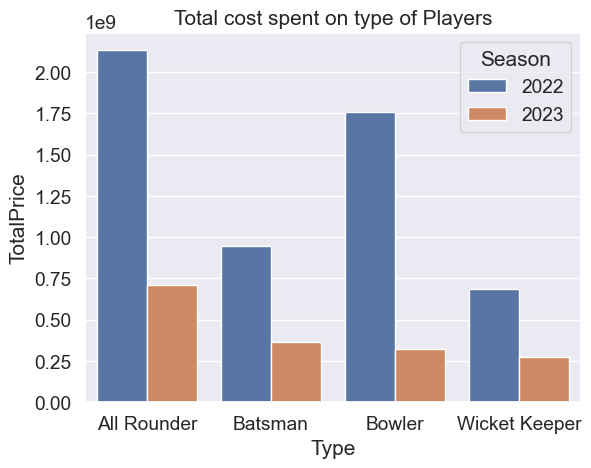

In [170]:
ndf = df.groupby(["Type","Season"]).agg(TotalPrice=("Price","sum")).reset_index()
sb.barplot(data = ndf, x = ndf["Type"], y = ndf["TotalPrice"], hue = ndf["Season"]).set_title("Total cost spent on type of Players")
sb.set(font_scale = 1.2)

## From this graph we conclude that most money is spent on buying all-rounderand 2022 is more expensive year than 2023.

c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


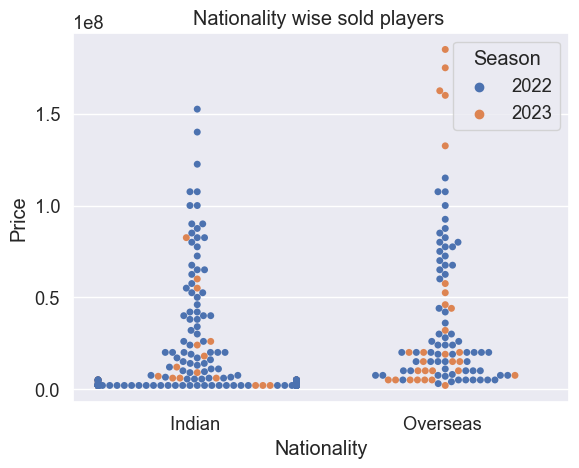

In [171]:
sb.swarmplot(data=df, x=df["Nationality"], y=df["Price"], hue=df.Season, palette="deep").set_title("Nationality wise sold players ")
sb.set(font_scale = 1.5)

## Conclusion: In 2022, Indian Players are purchased costly but in 2023 Overseas players had taken over.

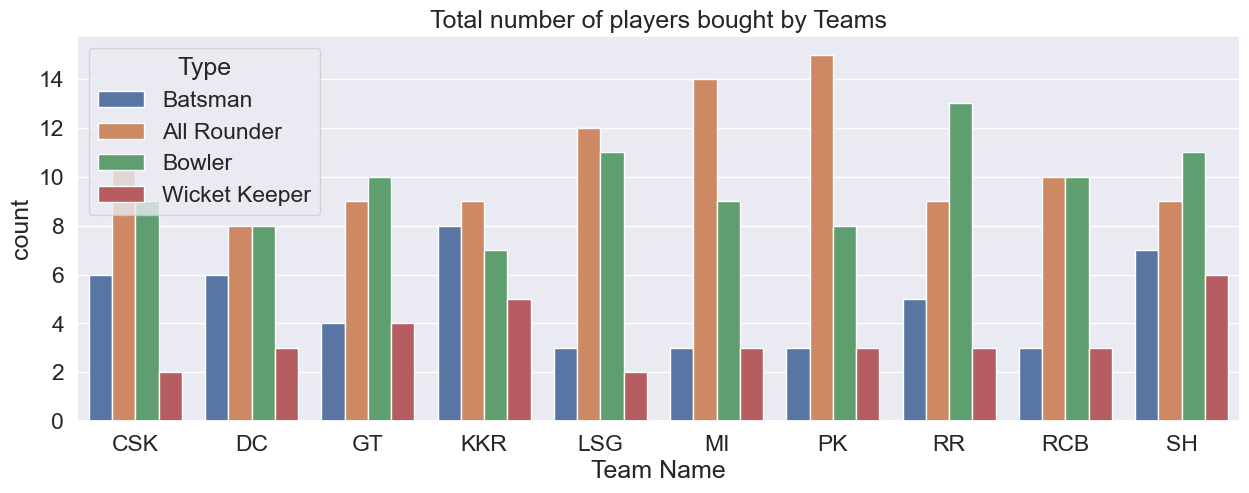

In [172]:
fig, ax = plt.subplots(figsize = (15,5))
sb.countplot(data = df, x = df['Team Name'],hue = df['Type'],ax = ax).set_title("Total number of players bought by Teams")
sb.set(font_scale = 1.2)

## Conclusion : Almost all the team has spend more money on purchasing "All Rounder" players but "Rajasthan Royals (RR)","Gujrat Titans (GT)"and "Sunrisers Hydrabad(SH)" has spend more money on bowlers

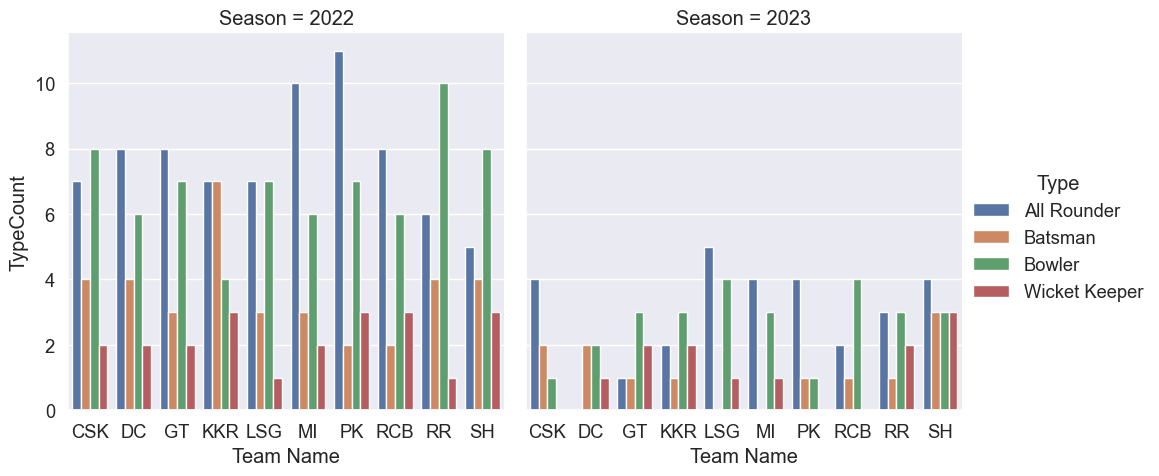

In [173]:
ndf = df.groupby(['Season','Team Name','Type']).agg(TypeCount = ('Type','count')).reset_index()
sb.catplot(data = ndf, x = 'Team Name', y = 'TypeCount', hue = 'Type', col = 'Season', kind = 'bar')
sb.set(font_scale = 1.2)

## Conclusion : In 2022, Teams has purchased more players than 2023.

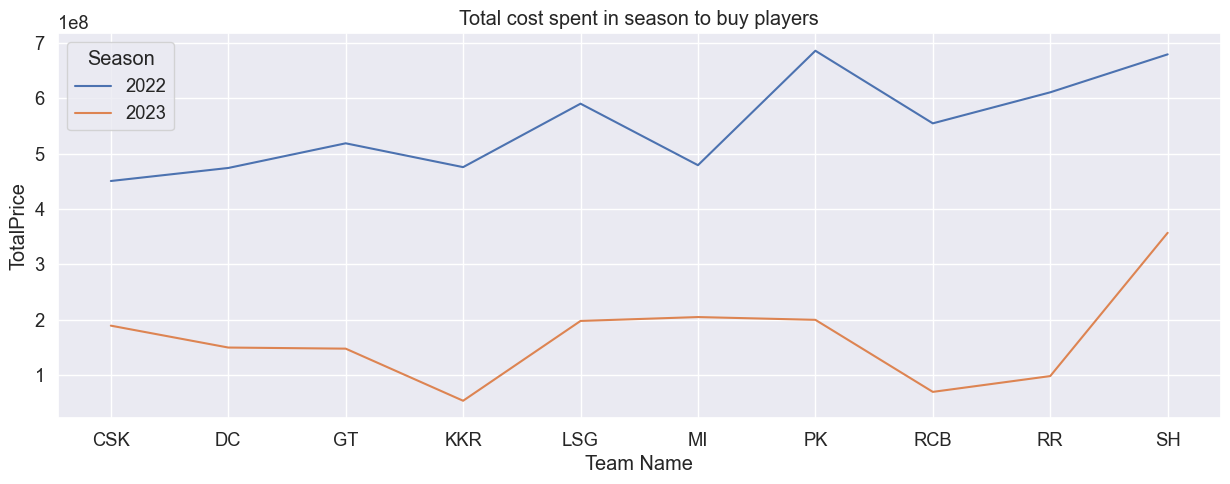

In [174]:
ndf = df.groupby(["Team Name", "Season"]).agg(TotalPrice = ("Price","sum")).reset_index()
plt.subplots(figsize = (15,5))
sb.lineplot(data = ndf, x = 'Team Name', y = 'TotalPrice', markers = True, hue = 'Season', palette="deep").set_title("Total cost spent in season to buy players")
sb.set(font_scale = 1.25)

## Conclusion : 2022 was more expensive than 2023

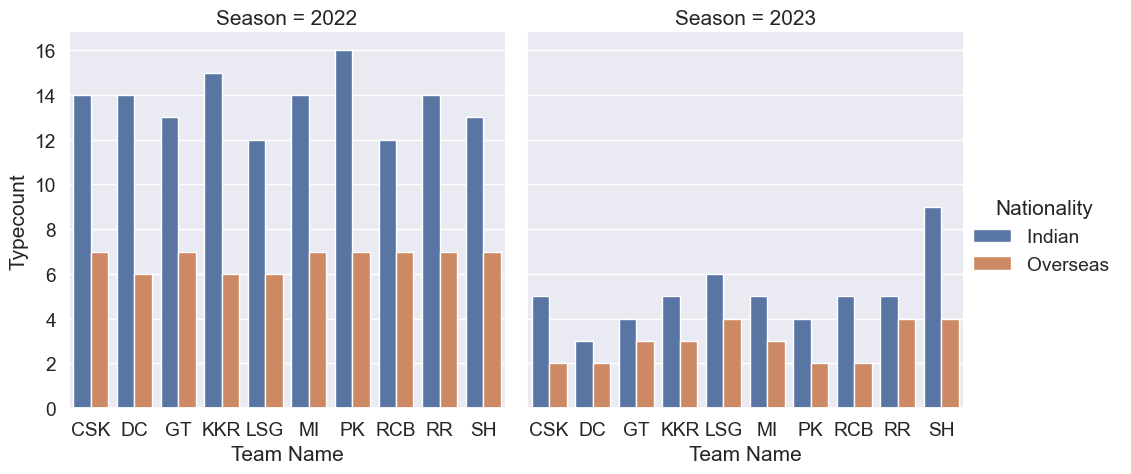

In [175]:
ndf = df.groupby(['Season','Team Name', 'Nationality']).agg(Typecount = ("Nationality","count")).reset_index()
sb.catplot(data = ndf, x = 'Team Name', y = 'Typecount', hue = 'Nationality', col = 'Season',kind="bar")

## Conclusion : Indian players are sold more as compare to overseas players in both the seasons.

Text(0.5, 1.0, 'Top 5 most expensive players in 2022')

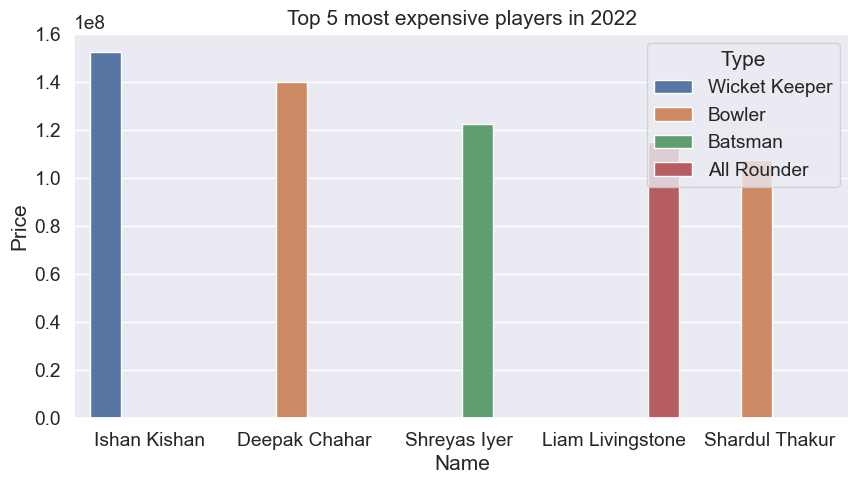

In [176]:
exp_player_df = df.loc[df.Season == 2022].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive players in 2022")


Text(0.5, 1.0, 'Top 5 most expensive players in 2023')

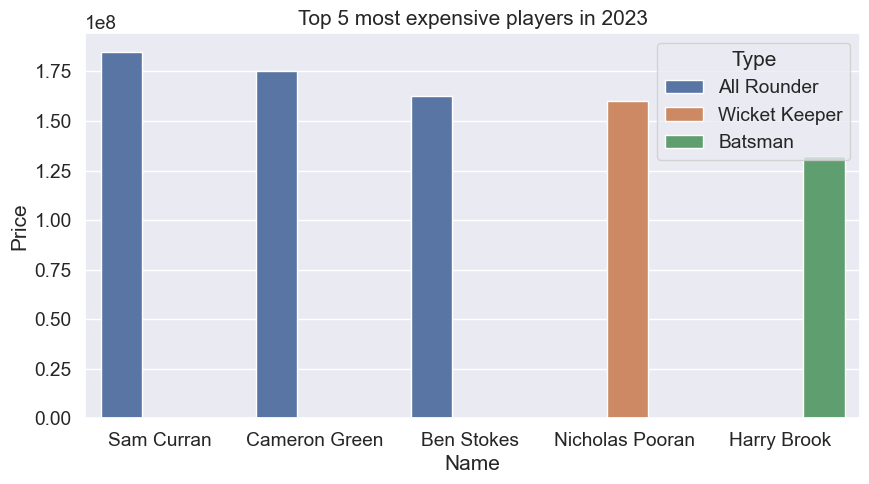

In [177]:
exp_player_df = df.loc[df.Season == 2023].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive players in 2023")


Text(0.5, 1.0, 'Top 5 most expensive players in 2022-23')

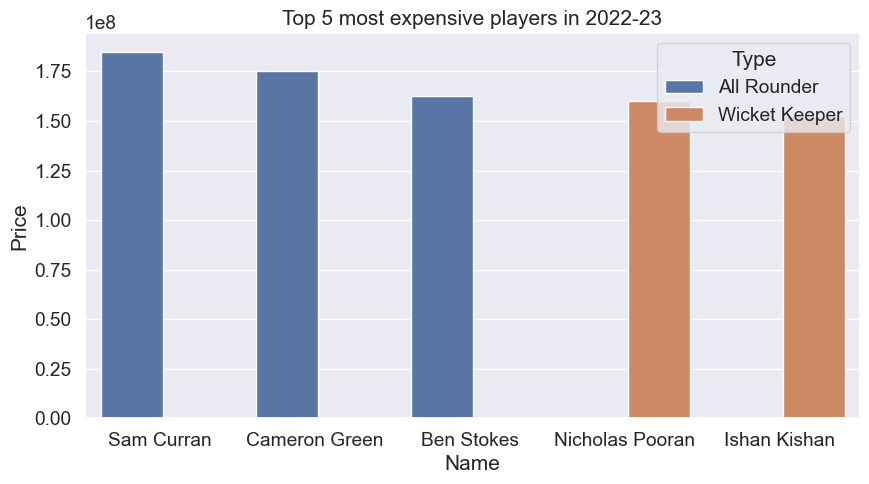

In [178]:
exp_player_df = df.sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive players in 2022-23")

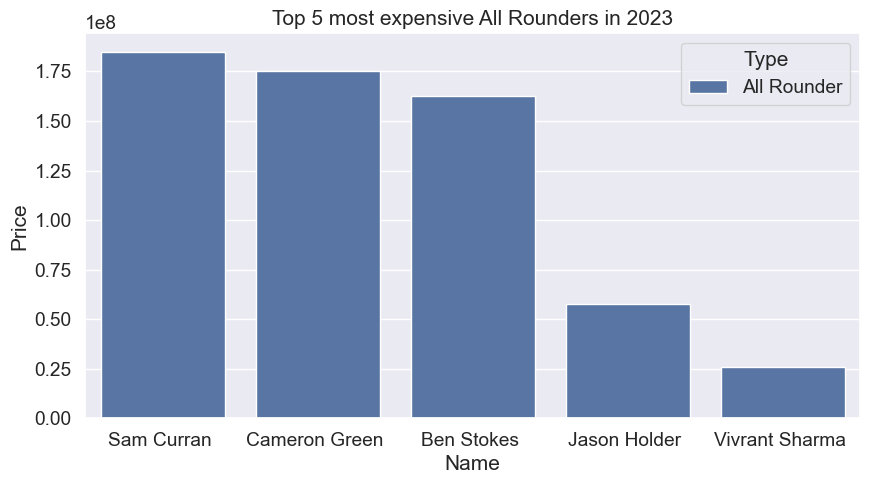

In [179]:
exp_player_df = df.loc[df.Season == 2023].loc[df.Type == 'All Rounder'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price',width = 0.8, hue = 'Type', ax = ax).set_title("Top 5 most expensive All Rounders in 2023")
sb.set(font_scale = 1.25) 

Text(0.5, 1.0, 'Top 5 most expensive All Rounders in 2022')

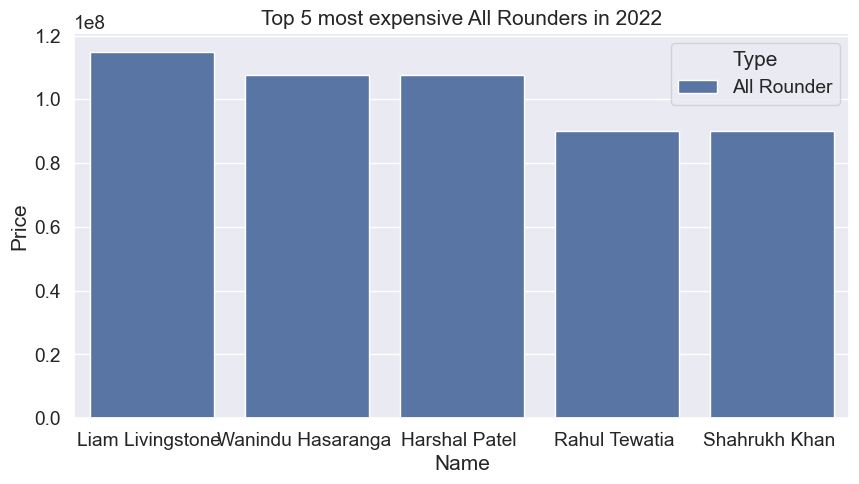

In [180]:
exp_player_df = df.loc[df.Season == 2022].loc[df.Type == 'All Rounder'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive All Rounders in 2022")

Text(0.5, 1.0, 'Top 5 most expensive bowlers in 2023')

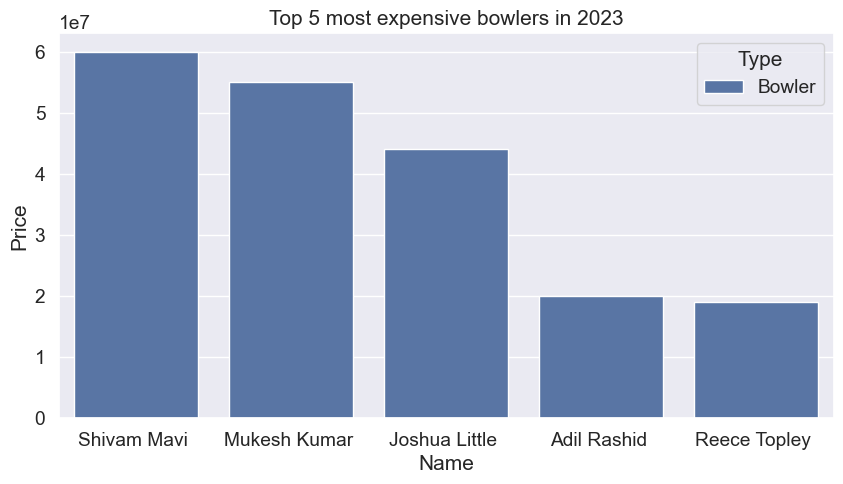

In [181]:
exp_player_df = df.loc[df.Season == 2023].loc[df.Type == 'Bowler'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive bowlers in 2023")

Text(0.5, 1.0, 'Top 5 most expensive bowlers in 2022')

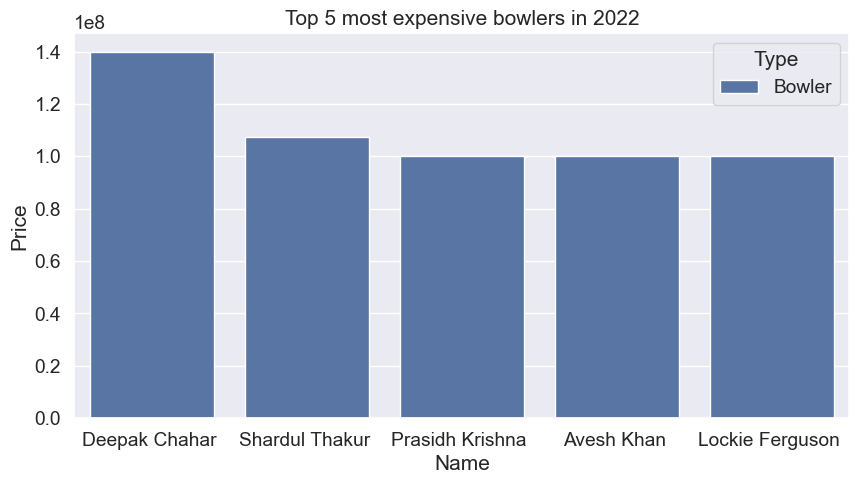

In [182]:
exp_player_df = df.loc[df.Season == 2022].loc[df.Type == 'Bowler'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive bowlers in 2022")

Text(0.5, 1.0, 'Top 5 most expensive batsman in 2023')

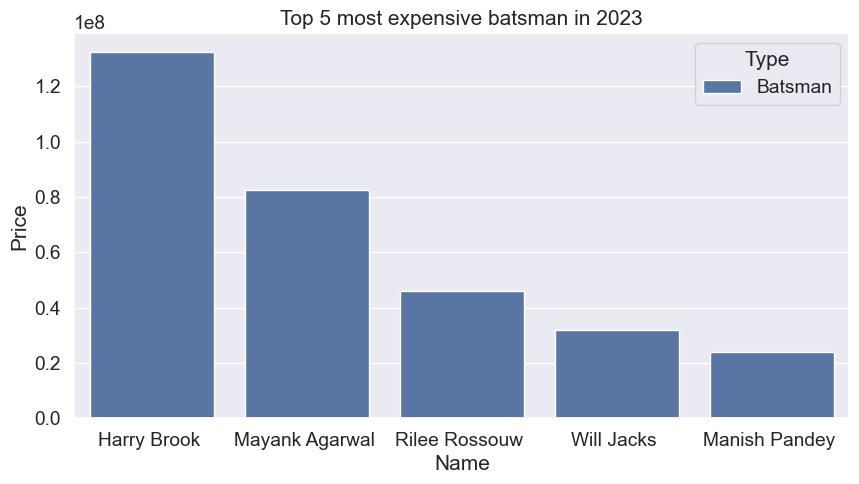

In [183]:
exp_player_df = df.loc[df.Season == 2023].loc[df.Type == 'Batsman'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive batsman in 2023")

Text(0.5, 1.0, 'Top 5 most expensive batsman in 2022')

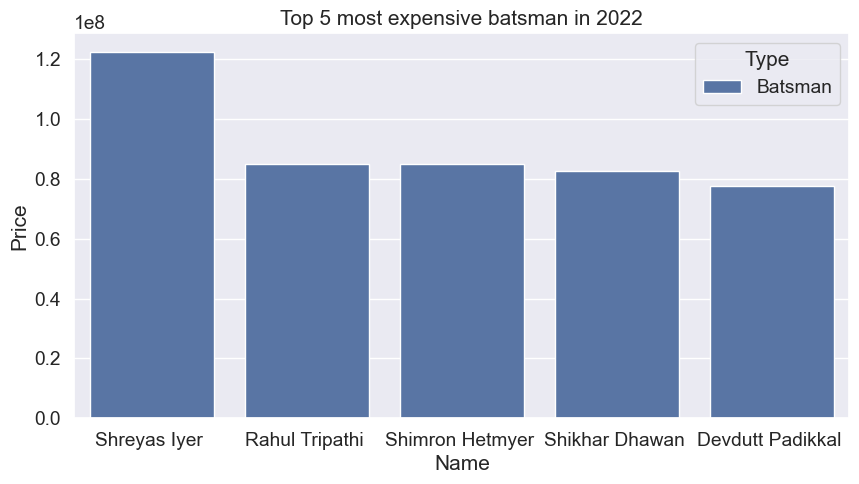

In [184]:
exp_player_df = df.loc[df.Season == 2022].loc[df.Type == 'Batsman'].sort_values(['Price'], ascending = False).head(5)
fig, ax = plt.subplots(figsize = (10,5))
sb.barplot(data = exp_player_df, x = 'Name', y = 'Price', hue = 'Type', ax = ax).set_title("Top 5 most expensive batsman in 2022")